In [4]:
import tensorflow as tf
from tensorflow import keras


In [5]:
fashion_mnist = keras.datasets.fashion_mnist


In [6]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,  (3,3),  activation= 'relu',
                           input_shape= (28,  28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64,  (3,3),  activation= 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation  = tf.nn.relu),
    tf.keras.layers.Dense(10,  activation  = tf.nn.softmax)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Define the Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
# Then using it in your model training
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [9]:
 model.fit(train_images,  train_labels, epochs= 3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 90s 47ms/step - accuracy: 0.7607 - loss: 1.4707
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 46ms/step - accuracy: 0.8738 - loss: 0.3453
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 45ms/step - accuracy: 0.8907 - loss: 0.2955


In [10]:
test_loss,  test_acc= model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8771 - loss: 0.3319


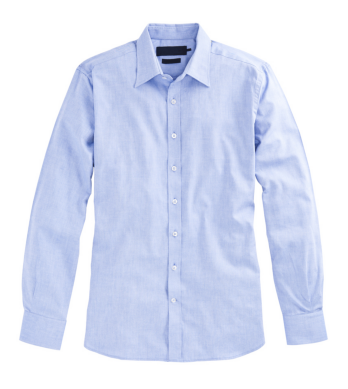

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
img_path = 'abc.jpg'  # Replace with your image file path
img = mpimg.imread(img_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

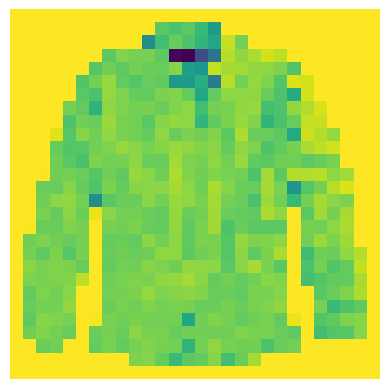

In [18]:
from tensorflow.keras.preprocessing import image
import numpy as np
img = image.load_img(img_path, color_mode='grayscale', target_size=(28, 28, 1))


# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)





In [19]:
predictions = model.predict(img_array)

# View the predictions
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0.09452959 0.07352073 0.14391111 0.08962111 0.09145094 0.01971536
  0.3079692  0.01883206 0.13845691 0.02199293]]


The highest probability is at index 6 with a value of 0.3079692, which corresponds to the Shirt class. Thus, the model is predicting that the image most likely belongs to the Shirt category